Load the Complete Evaluation Table and aggregate the Absolute Errors by Mean --> generating MAE

In [1]:
import pandas as pd

# We concatenate the evaluation results of the quantifiers and the ensemble quantifier
# to have a single table for the evaluation results
quantifiers_eval = pd.read_csv("./plot_data/reg_quantifiers_evaluation_table.csv")
reg_ensemble_quantifier_eval = pd.read_csv("./plot_data/reg_ensemble_quantifier_evaluation_table.csv")
knn_ensemble_quantifier_eval = pd.read_csv("./plot_data/knn_ensemble_quantifier_evaluation_table.csv")
eval_table = pd.concat([quantifiers_eval, reg_ensemble_quantifier_eval, knn_ensemble_quantifier_eval], axis=0)


eval_table = eval_table.groupby(["quantifier", "dataset"]).agg(
        abs_error = pd.NamedAgg(column="abs_error", aggfunc="mean"),
        run_time = pd.NamedAgg(column="run_time", aggfunc="mean")
    )
eval_table.reset_index(inplace=True)

Generate Ranking Plots by Error

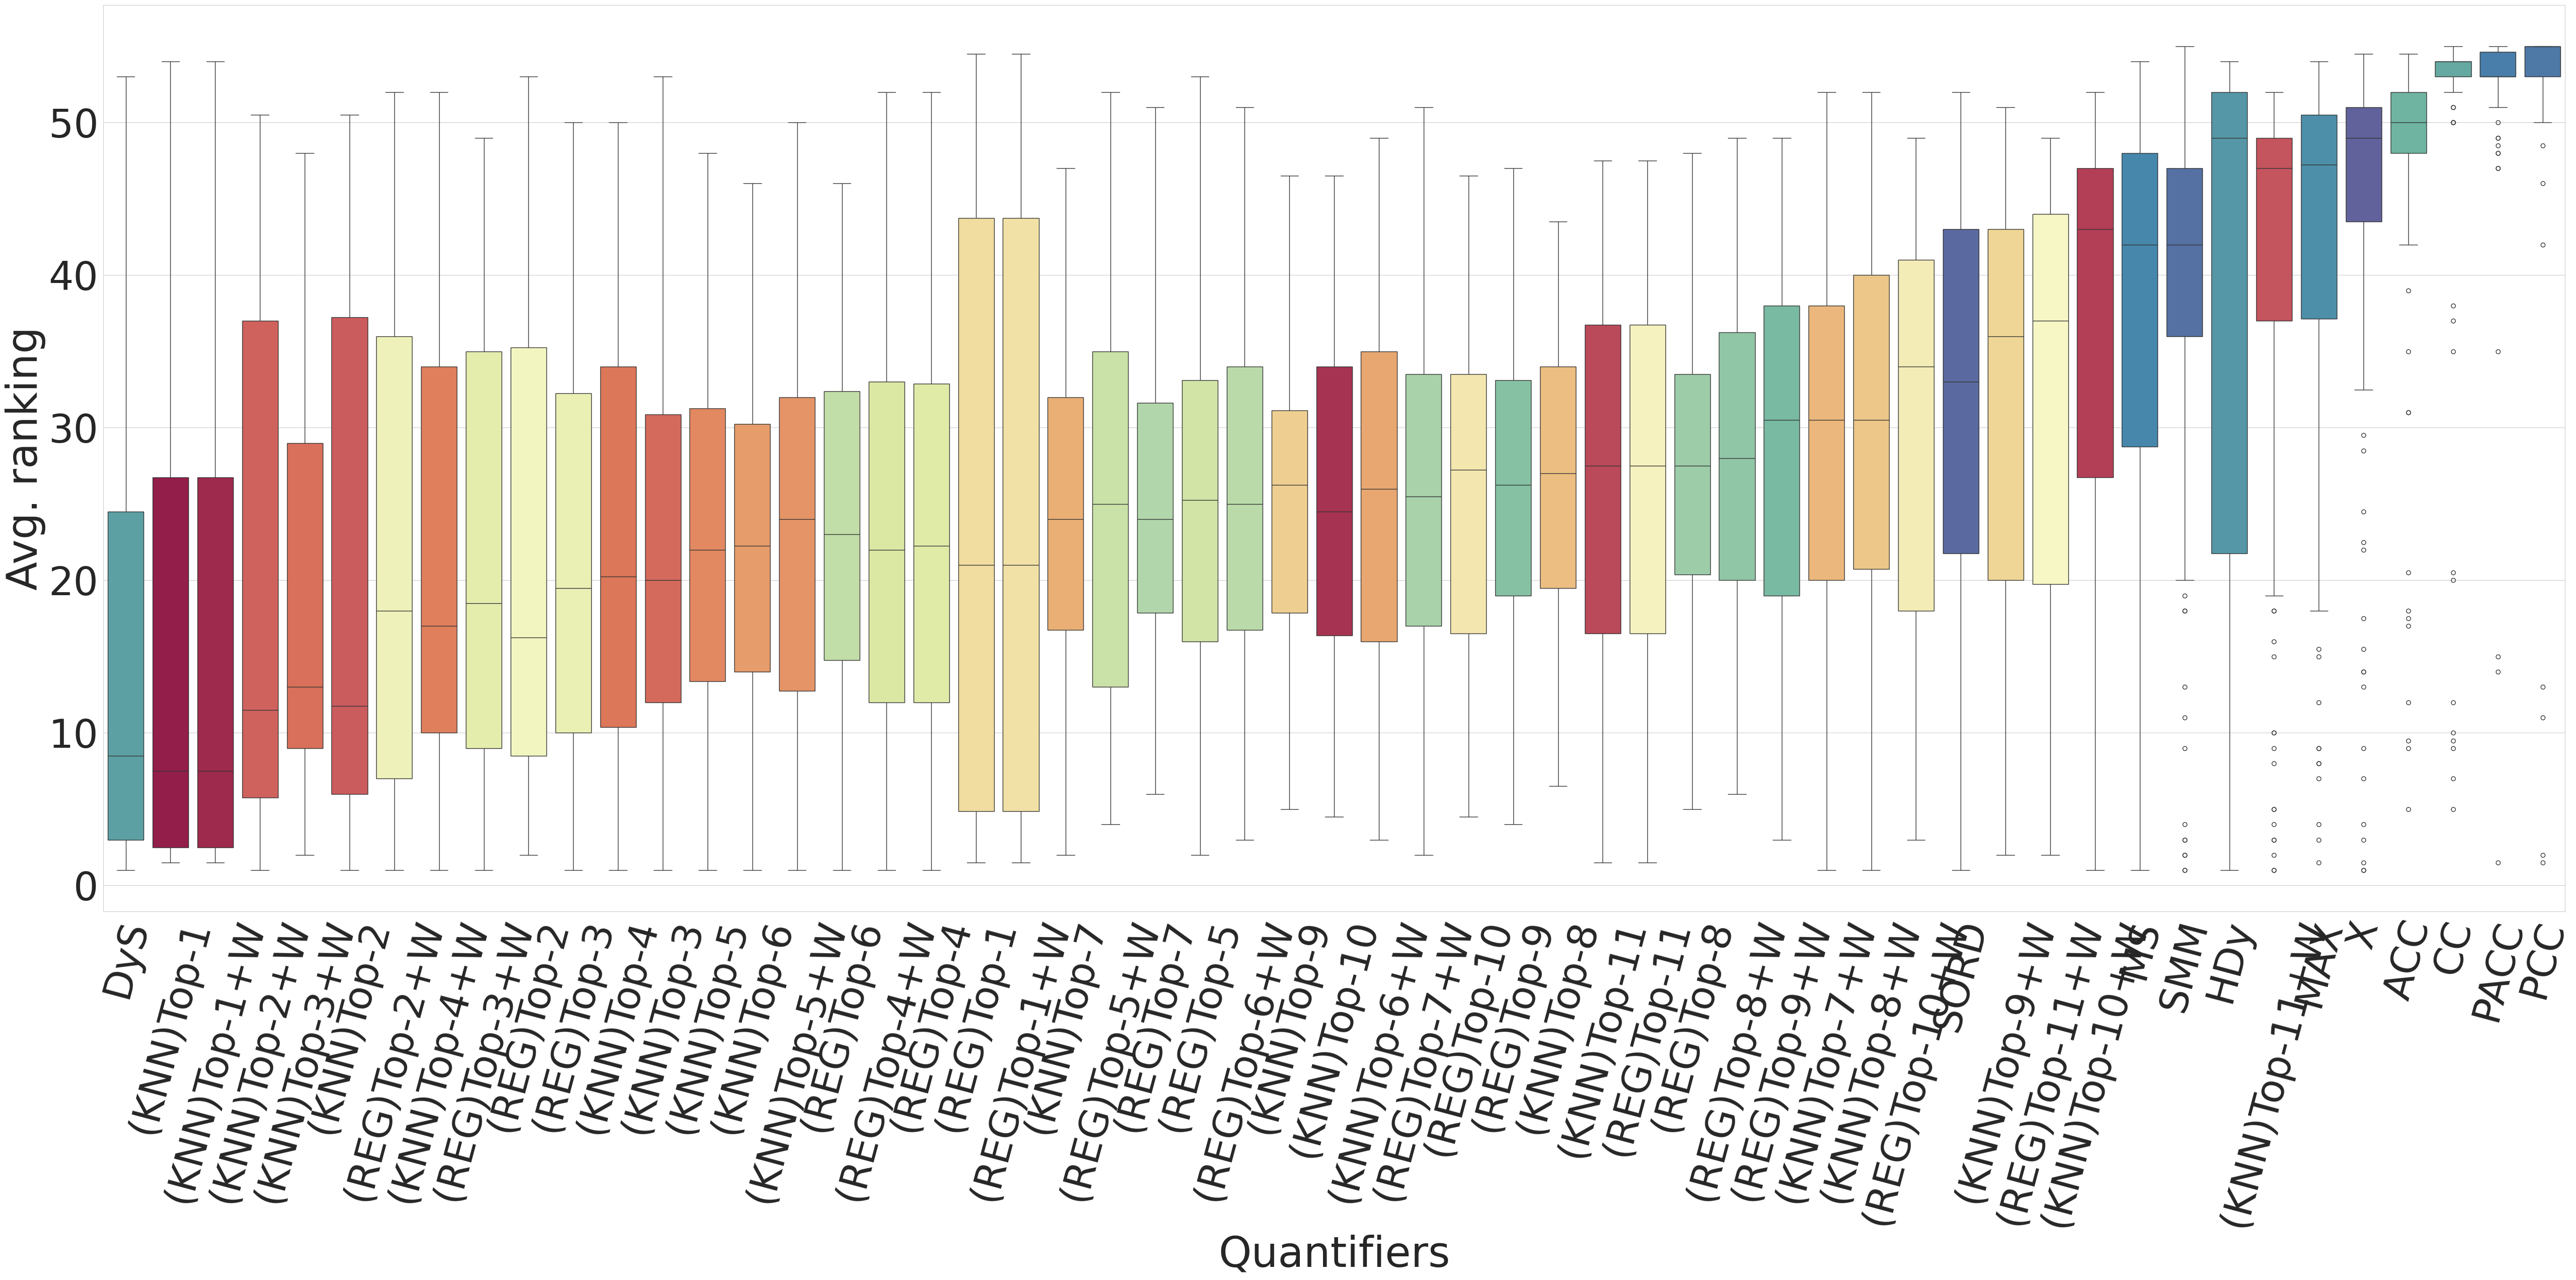

,quantifier,dataset,abs_error,run_time,error_rank
0,(KNN)Top-1,1043_ada_agnostic,0.046386,0.047344,5.5
1,(KNN)Top-1,1460_banana,0.093577,0.047236,10.5
2,(KNN)Top-1,1462_banknote-authentication,0.006117,0.046136,1.5
3,(KNN)Top-1,1466_cardiotocography,0.001460,0.046466,51.5
4,(KNN)Top-1,1475_first-order-theorem-proving,0.066985,0.047930,33.5
...,...,...,...,...,...
5495,X,spambase,0.023555,0.000245,49.0
5496,X,sylva_prior,0.006520,0.000266,35.0
5497,X,visualizing_soil,0.002000,0.000253,1.5
5498,X,wind,0.035743,0.000247,50.0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['dataset'], as_index=False )['abs_error'].rank(method='average', ascending = True)

    order = sample.groupby('quantifier')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['quantifier'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width, plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette, hue='quantifier', legend=False)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    # if file != "":
    #     ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

boxplotMae(eval_table)